In [96]:
import pickle
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, AvgPool2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import ReduceLROnPlateau
from keras.utils import normalize
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
%matplotlib inline

train_images = pd.read_pickle('/Users/Tausal21/Desktop/comp_551/mini_project3/train_images.pkl')
train_labels = pd.read_csv('/Users/Tausal21/Desktop/comp_551/mini_project3/train_labels.csv')

train_labels_only = []
train_labels_only = train_labels['Category'].values.tolist()
train_labels_only = np.array(train_labels_only)
#train_labels_only = train_labels.drop(labels = ["Id"],axis = 1)
#train_labels_only = train_labels.drop(columns = ["Id"])
print(train_labels_only.shape)

train_images = train_images/255.0
print(train_images.shape)

train_images = np.array(train_images)
train_labels_only = to_categorical(train_labels_only, num_classes = 10)

print(train_labels.shape)

train_images = train_images.reshape(-1,64,64,1)
print(train_images.shape)


(40000,)
(40000, 64, 64)
(40000, 2)
(40000, 64, 64, 1)


In [97]:
#plt.title('Label: {}'.format(train_labels.iloc[16]['Category']))
#plt.imshow(train_images[16])

In [98]:
X_train, X_val, Y_train, Y_val = train_test_split(train_images, train_labels_only, test_size = 0.25, random_state=2)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(30000, 64, 64, 1)
(10000, 64, 64, 1)
(30000, 10)
(10000, 10)


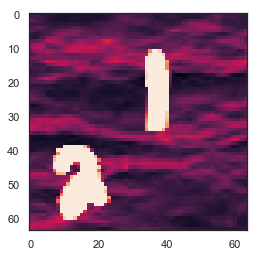

In [99]:
sns.set(style='white', context='notebook', palette='deep')
g = plt.imshow(X_train[0][:,:,0])

In [100]:
'''
train_batches = ImageDataGenerator(
    data_format="channels_last",
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True).flow(X_train, Y_train, batch_size=30, shuffle=True)
validation_batches = ImageDataGenerator(
    data_format="channels_last",
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True).flow(X_val, Y_val, batch_size=10, shuffle=True)
'''
'''
model = Sequential([
    Conv2D(8, (3,3), activation='relu', data_format="channels_last", input_shape=(64,64,1)),
    Flatten(),
    Dense(10, activation='softmax')
])
'''

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

#model.fit_generator(train_batches, steps_per_epoch=10, validation_data=validation_batches, validation_steps=10, epochs=25, verbose=2)
model.fit(X_train, Y_train,
          batch_size=1000,
          epochs=25,
          verbose=2,
          validation_data=(X_val, Y_val))


Train on 30000 samples, validate on 10000 samples
Epoch 1/25
 - 3973s - loss: 2.3043 - acc: 0.1065 - val_loss: 2.2987 - val_acc: 0.1152
Epoch 2/25
 - 197s - loss: 2.2766 - acc: 0.1470 - val_loss: 2.2451 - val_acc: 0.1759
Epoch 3/25
 - 182s - loss: 2.1870 - acc: 0.2125 - val_loss: 2.1544 - val_acc: 0.2272
Epoch 4/25
 - 180s - loss: 2.0643 - acc: 0.2772 - val_loss: 2.0835 - val_acc: 0.2651
Epoch 5/25
 - 224s - loss: 1.8983 - acc: 0.3541 - val_loss: 1.9666 - val_acc: 0.3205
Epoch 6/25
 - 205s - loss: 1.7271 - acc: 0.4187 - val_loss: 1.8674 - val_acc: 0.3514
Epoch 7/25
 - 189s - loss: 1.5491 - acc: 0.4838 - val_loss: 1.8142 - val_acc: 0.3722
Epoch 8/25
 - 190s - loss: 1.3872 - acc: 0.5476 - val_loss: 1.7633 - val_acc: 0.3931
Epoch 9/25
 - 209s - loss: 1.1970 - acc: 0.6172 - val_loss: 1.7261 - val_acc: 0.4134
Epoch 10/25
 - 213s - loss: 1.0140 - acc: 0.6852 - val_loss: 1.6902 - val_acc: 0.4373
Epoch 11/25
 - 207s - loss: 0.8544 - acc: 0.7460 - val_loss: 1.6848 - val_acc: 0.4415
Epoch 12/25


In [101]:
'''
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=25)
'''

"\nmodel = Sequential()\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\n\nmodel.compile(Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])\nmodel.fit(X_train, Y_train, epochs=25)\n"

In [102]:
'''
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(AvgPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 30
batch_size = 1000

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val),callbacks=[learning_rate_reduction])
'''

'\nmodel = Sequential()\n\nmodel.add(Conv2D(filters = 32, kernel_size = (5,5),padding = \'Same\', \n                 activation =\'relu\', input_shape = (64,64,1)))\nmodel.add(Conv2D(filters = 32, kernel_size = (5,5),padding = \'Same\', \n                 activation =\'relu\'))\nmodel.add(AvgPool2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = \'Same\', \n                 activation =\'relu\'))\nmodel.add(AvgPool2D(pool_size=(2,2)))\nmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = \'Same\', \n                 activation =\'relu\'))\nmodel.add(AvgPool2D(pool_size=(2,2)))\nmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = \'Same\', \n                 activation =\'relu\'))\nmodel.add(AvgPool2D(pool_size=(2,2), strides=(2,2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Flatten())\nmodel.add(Dense(256, activation = "relu"))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(10, activation = "softmax"))\n\noptimizer = RM